# Which Pittsburgh Neighborhood is the Healthiest?

Big Ideas Final Project by Shreya Agrawal, Paul Desaro, and Lauren Jablunovsky

The Covid-19 Pandemic has shown us that our health is not something we should take for granted. Our health is integrated into everything that we do, so it makes sense to prioritize health and wellness in our daily lives. When tasked with determining the best neighborhood in Pittsburgh, our team came to the conclusion that the *best* neighborhood will ultimately be the **healthiest** neighborhood.

### What determines a healthy neighborhood?

There are so many factors to consider when thinking about what makes a neigborhood healthy. While environmental factors continue to have an increased role in determining the quality of necessities like air and water, our group leaned into other, non-environmental metrics for quantifying the health of Pittsburgh neighborhoods. The three metrics we decided to consider are **nutrition, access to medical care, and opportunity for recreation and fitness.** Orinigally, we considered focusing on just one of any of these three metrics and looked for datasets that fit under just one idea, but then realized our analysis would be far more compelling if we combined analysis under all *three* ideas into the overall metric of health.

### The Datasets

All of our datasets come from the WPRDC website. For the nutrition metric, Lauren analysed the dataset containing information about the Allegheny County Farmers Market Nutrition Program, specifically the CSV file containing the current/most recent markets.  https://data.wprdc.org/dataset/allegheny-county-farmers-markets-locations.

For the Fitness and Recreation metric, Shreya analyzed the dataset containing information about the steps present in different neighborhoods of the city of Pittsburgh. Additionally, she used a parks dataset which contained information regarding the parks in each neighborhood of Pittsburgh

# Individual Data Analysis

First up, let's take a look at the nutrition of Pittsburgh neighborhoods. Farmer's markets are an excellent way for a community to get access to locally grown, healthy foods, so seeing which neighborhood has the most farmer's markets will help us determine the healthiest neighborhood overall.

In [3]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

First, let's import our raw Farmer's Market data to see what we're working with.

In [4]:
farm_market = pd.read_csv("Farmers-market.csv")
farm_market.head()

market_id  market_type                          market_name  \
0         21   Farm Stand                Beccari's Farm Market   
1         51  Farm Market     Carrick Citiparks Farmers Market   
2         90  Farm Market          East Liberty Farmers Market   
3         92   Farm Stand  Eichner's Farm Market & Greenhouses   
4        207  Farm Market                       Monroeville FM   

                  address1         city state  zip_code   latitude  longitude  \
0     5095 Thomas Run Road      Oakdale    PA     15071  40.375388 -80.135377   
1    1529 Brownsville Road   Pittsburgh    PA     15210  40.391341 -79.986603   
2  N Euclid Ave & Broad St   Pittsburgh    PA     15026  40.470769 -79.922862   
3         285 Richard Road      Wexford    PA     15090  40.608589 -80.061099   
4        2399 Tillbrook Rd  Monroeville    PA     15146  40.418362 -79.763612   

          phone  phone_ext     county  
0  4.122219e+09        NaN  Allegheny  
1  4.124227e+09        NaN  Allegheny  
2           NaN        NaN  Allegheny  
3  7.249352e+09        NaN  Allegheny  
4  7.245389e+09        NaN  Allegheny

Cool! Just from the head of our data, I can see some of these markets aren't in Pittsburgh neighborhoods though. Maybe plotting the points on our Pittsburgh neighborhoods shapefile will help us see how many points we'll need to eliminate.

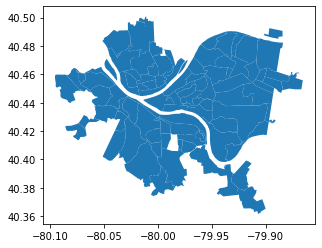

In [5]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

Here's the shapefile for our Pittsburgh neighborhoods. Before we plot the farmer's markets, I'm going to make the file a black and white outline so it's easier to read our data on.

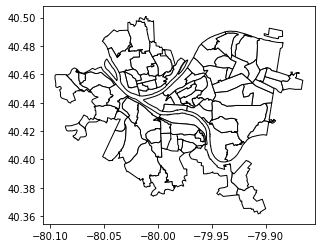

In [6]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_aspect('equal')
neighborhoods.plot(ax=ax, color="white", edgecolor='black')
plt.show()

Perfect. Now we can plot our points.

Text(0.5, 1.0, "Farmer's Markets in Pittsburgh")

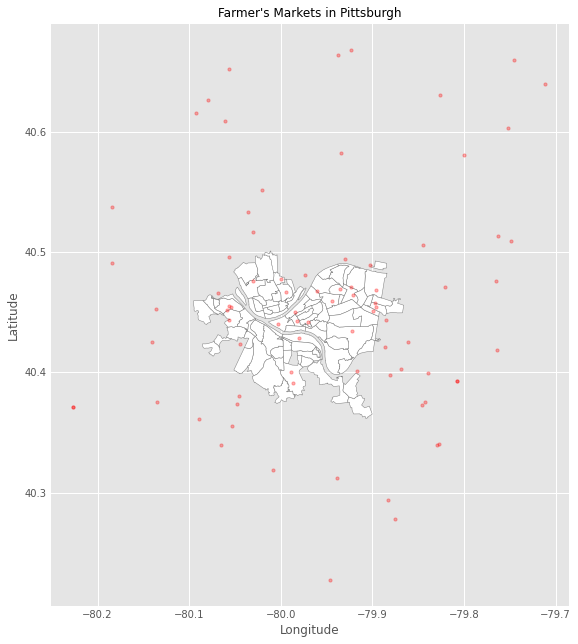

In [7]:
with plt.style.context(("fivethirtyeight", "ggplot")):
    neighborhoods.plot(figsize=(12,10), color="white", edgecolor = "grey");
plt.scatter(farm_market.longitude, farm_market.latitude, s=10, color="red", alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Farmer\'s Markets in Pittsburgh")

Yikes! There's a ton of points outside of our shapefile that we need to eliminate. To cut out most of these, I'm first going to make a query mask based on the coordinates from our shapefile so we can get rid of most of our irrelavent points. 

In [8]:
query_mask = ((farm_market['latitude'] < 40.50) & (farm_market["latitude"] > 40.36) & (farm_market["longitude"] > -80.10) & (farm_market["longitude"] < -79.90))
city_markets = farm_market[query_mask]
city_markets.head()


market_id  market_type                                     market_name  \
1          51  Farm Market                Carrick Citiparks Farmers Market   
2          90  Farm Market                     East Liberty Farmers Market   
9        3688   Farm Stand  Green Grocer/UPMC Matilda Theiss Health Center   
12       3782   Farm Stand                 Green Grocer /Northview Heights   
16       3683   Farm Stand       Green Grocer/Sharpsburg Community Library   

                   address1        city state  zip_code   latitude  longitude  \
1     1529 Brownsville Road  Pittsburgh    PA     15210  40.391341 -79.986603   
2   N Euclid Ave & Broad St  Pittsburgh    PA     15026  40.470769 -79.922862   
9            373 Burrows St  Pittsburgh    PA     15213  40.442058 -79.970400   
12       533 Mt Pleasant Rd  Pittsburgh    PA     15214  40.477670 -79.999793   
16         1212 Main Street  Pittsburgh    PA     15215  40.494332 -79.930202   

           phone  phone_ext     county  
1   4.124227e+09        NaN  Allegheny  
2            NaN        NaN  Allegheny  
9            NaN        NaN  Allegheny  
12           NaN        NaN  Allegheny  
16           NaN        NaN  Allegheny

Cool, that narrows it down for sure. If we plot this data and then overlay it on our Pittsburgh shapefile again, I think that'll help us see how many points are still slightly outside the Pittsburgh neighborhoods.

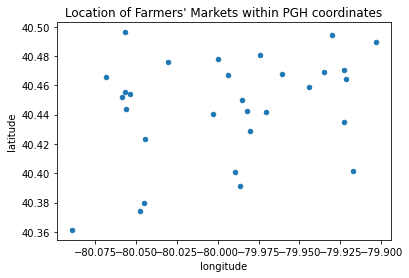

In [9]:
city_markets.plot(kind = "scatter", x = "longitude", y = "latitude", title= "Location of Farmers' Markets within PGH coordinates")

Text(0.5, 1.0, "Farmer's Markets in Pittsburgh")

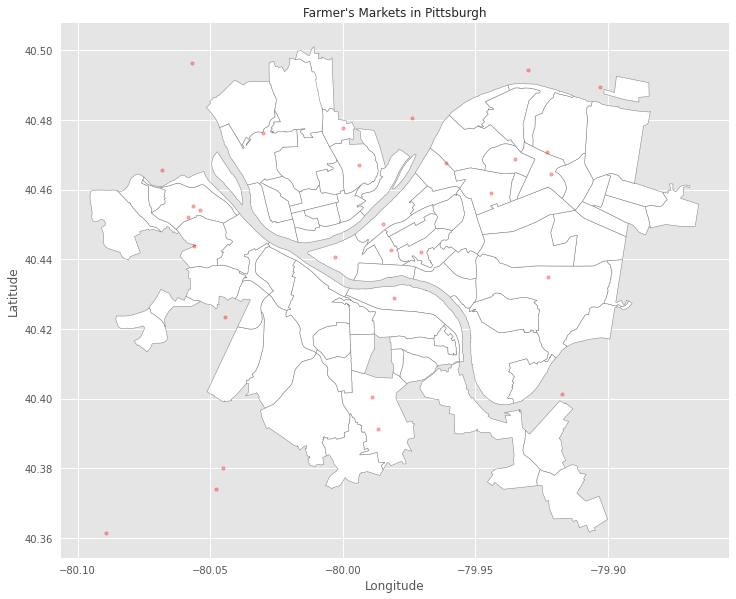

In [10]:
with plt.style.context(("fivethirtyeight", "ggplot")):
    neighborhoods.plot(figsize=(12,10),
               color="white",
               edgecolor = "grey");
plt.scatter(city_markets.longitude, city_markets.latitude, s=10, color="red", alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Farmer\'s Markets in Pittsburgh")

Clearly improvement. It looks like we have 10 points that still don't lie within the shapefile, so I'm going to grab the coordinates from the city_markets dataframe and use this website: https://www.gps-coordinates.net/ to check which points are outside this shapefile, as well as get the neighborhoods for our valid points. Then, I'll make a new dataframe of the points that we need and the neighborhood they are in so we can merge it with our original dataframe.

In [48]:
map_markets = pd.DataFrame({"market_name": ["Carrick Citiparks Farmers Market","East Liberty Farmers Market","Green Grocer/UPMC Matilda Theiss Health Center","Green Grocer /Northview Heights", "Green Grocer/Old Shop n' Save Building", "Green Grocer/Pavillion", "Garfield Farm Stand", "Lawrenceville Farmers Market", "Pittsbugh Urban Graden project", "Green Grocer/Sheraden", "Green Grocer","Green Grocer/Three Rivers Manor", "Green Grocer/Sheraden Library", "Green Grocer/Woods Run Library", "Squirrel Hill FM", "Bloomfield Farmers Market", "Farmers Market Cooperative of East Liberty", "Pittsburgh Market Square", "Southside Farmers Market", "Sturges Orchards"] , "Neighborhood": ["Carrick","East Liberty","Terrace Village","Northview Heights", "Crawford-Roberts", "Sheraden", "Garfield", "Lower Lawrenceville", "Crafton", "Sheraden", "Carrick", "Spring Hill-City View", "Sheraden", "Marshall-Shadeland", "Squirrel Hill South", "Bloomfield", "East Liberty", "Central Business District", "Southside Flats", "Strip District"]})
map_markets

market_name               Neighborhood
0                 Carrick Citiparks Farmers Market                    Carrick
1                      East Liberty Farmers Market               East Liberty
2   Green Grocer/UPMC Matilda Theiss Health Center            Terrace Village
3                  Green Grocer /Northview Heights          Northview Heights
4           Green Grocer/Old Shop n' Save Building           Crawford-Roberts
5                           Green Grocer/Pavillion                   Sheraden
6                              Garfield Farm Stand                   Garfield
7                     Lawrenceville Farmers Market        Lower Lawrenceville
8                   Pittsbugh Urban Graden project                    Crafton
9                            Green Grocer/Sheraden                   Sheraden
10                                    Green Grocer                    Carrick
11                 Green Grocer/Three Rivers Manor      Spring Hill-City View
12                   Green Grocer/Sheraden Library                   Sheraden
13                  Green Grocer/Woods Run Library         Marshall-Shadeland
14                                Squirrel Hill FM        Squirrel Hill South
15                       Bloomfield Farmers Market                 Bloomfield
16      Farmers Market Cooperative of East Liberty               East Liberty
17                        Pittsburgh Market Square  Central Business District
18                        Southside Farmers Market            Southside Flats
19                                Sturges Orchards             Strip District

Neighborhoods located! Time to merge!

In [49]:
merge_with_og = pd.merge(map_markets,farm_market)
merge_with_og.head()

market_name       Neighborhood  \
0                Carrick Citiparks Farmers Market            Carrick   
1                     East Liberty Farmers Market       East Liberty   
2  Green Grocer/UPMC Matilda Theiss Health Center    Terrace Village   
3                 Green Grocer /Northview Heights  Northview Heights   
4          Green Grocer/Old Shop n' Save Building   Crawford-Roberts   

   market_id  market_type                 address1        city state  \
0         51  Farm Market    1529 Brownsville Road  Pittsburgh    PA   
1         90  Farm Market  N Euclid Ave & Broad St  Pittsburgh    PA   
2       3688   Farm Stand           373 Burrows St  Pittsburgh    PA   
3       3782   Farm Stand       533 Mt Pleasant Rd  Pittsburgh    PA   
4       3684   Farm Stand          1850 Centre Ave  Pittsburgh    PA   

   zip_code   latitude  longitude         phone  phone_ext     county  
0     15210  40.391341 -79.986603  4.124227e+09        NaN  Allegheny  
1     15026  40.470769 -79.922862           NaN        NaN  Allegheny  
2     15213  40.442058 -79.970400           NaN        NaN  Allegheny  
3     15214  40.477670 -79.999793           NaN        NaN  Allegheny  
4     15219  40.442741 -79.981917           NaN        NaN  Allegheny

Awesome, now we can plot these points *one more time* and they should all lie within our Pittsburgh neighborhood shapefile.

Text(0.5, 1.0, "Farmer's Markets in Pittsburgh")

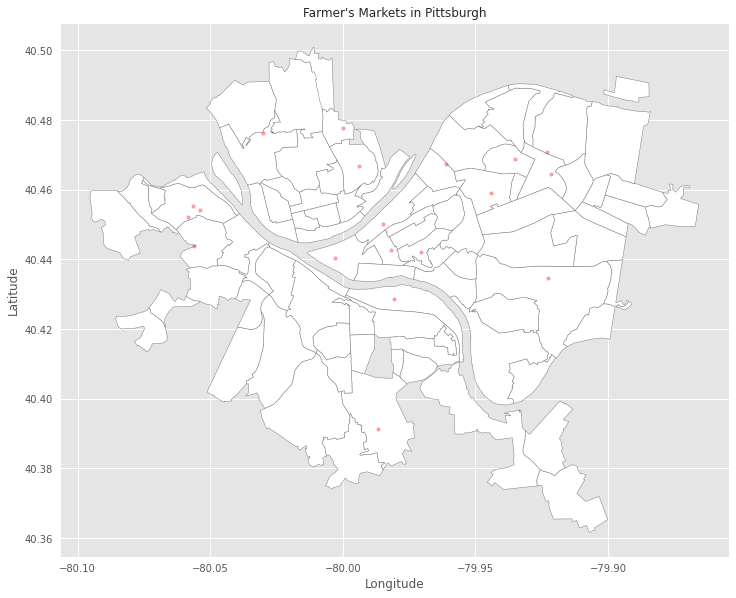

In [50]:
with plt.style.context(("seaborn", "ggplot")):
    neighborhoods.plot(figsize=(12,10),
               color="white",
               edgecolor = "grey");
plt.scatter(merge_with_og.longitude, merge_with_og.latitude, s=10, color="red", alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Farmer\'s Markets in Pittsburgh")

Looks good! Let's see which neighborhoods have the most farmer's markets now.

In [65]:
market_count = map_markets.groupby("Neighborhood").count()
market_count.sort_values("market_name", ascending = False)

market_name
Neighborhood                          
Sheraden                             3
Carrick                              2
East Liberty                         2
Bloomfield                           1
Central Business District            1
Crafton                              1
Crawford-Roberts                     1
Garfield                             1
Lower Lawrenceville                  1
Marshall-Shadeland                   1
Northview Heights                    1
Southside Flats                      1
Spring Hill-City View                1
Squirrel Hill South                  1
Strip District                       1
Terrace Village                      1

We have Sheraden on top with 3 farmer's market locations, Carrick and East Liberty tied for second with 2 farmer's markets each, and a massive tie for third place with the rest of our remaining neighborhoods. Let's put this information in a bar chart, for a little data visualization action.

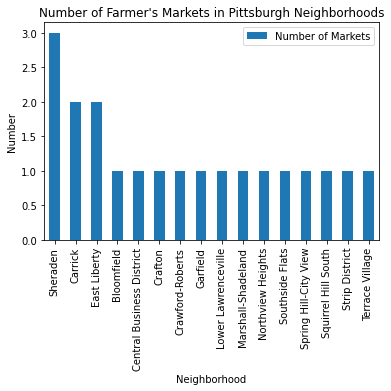

In [69]:
market_count.sort_values("market_name", ascending = False).plot.bar()
plt.title("Number of Farmer\'s Markets in Pittsburgh Neighborhoods")
plt.ylabel("Number")
plt.legend(["Number of Markets"])

Nice. Looks like Pittsburgh has a pretty decent selection of neighborhoods with farmer's markets, but if you're trying to *really* bulk up on organic produce every Saturday morning, Sheraden is the place to be.

# Combined Metric Analysis to determine Best Neighborhood

# Team Member conclusions